In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [24]:
df = pd.read_csv('reviews.csv')
print(df.shape)

(61594, 5)


In [25]:
df = df.head(2000)
print(df.shape)

(2000, 5)


In [26]:
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [27]:
df['Id'] = range(1, len(df) + 1)

In [28]:
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,Id
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,1
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,2
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,3
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,4
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,5


In [29]:
cols = ['Id'] + [col for col in df.columns if col != 'Id']
df = df[cols]

In [30]:
df.head()

,Id,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,1,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,3,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,4,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,5,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [31]:
df['Review'].values[0]

'Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.'

<AxesSubplot:title={'center':'Jumlah review berdasarkan rating bintang'}>

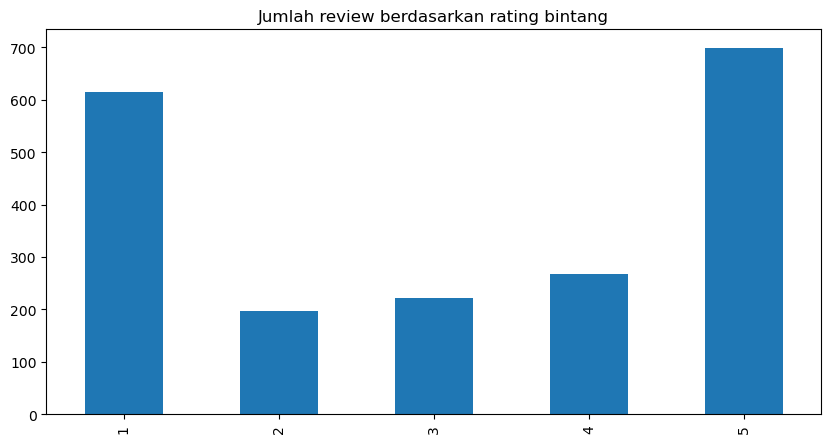

In [32]:
df['Rating'].value_counts().sort_index().plot(kind='bar', title='Jumlah review berdasarkan rating bintang',
                                             figsize=(10,5))

In [33]:
test = df['Review'][150]
print(test)

It’s the best App I have ever used for listening music. There are numerous options, playlists and specially blends.Spotify really knows me well. It creates playlists by my favourite songs which is appreciated. Artist mix,genre mix,mood mix these are so good. I like using Spotify. But I wish there were a few more advantages for those who use a free account. For example skipping more than 6 songs.


In [34]:
tokens = nltk.word_tokenize(test)
tokens[:10]

['It', '’', 's', 'the', 'best', 'App', 'I', 'have', 'ever', 'used']

In [35]:
tag = nltk.pos_tag(tokens)
tag[:10]

[('It', 'PRP'),
 ('’', 'VBZ'),
 ('s', 'VBZ'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('App', 'NN'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('ever', 'RB'),
 ('used', 'VBN')]

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

stm = SentimentIntensityAnalyzer()

In [37]:
stm.polarity_scores("I love using this app")

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}

In [38]:
stm.polarity_scores(test)

{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.968}

In [39]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    review = row['Review']
    myid = row['Id']
    res[myid] = stm.polarity_scores(review)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [40]:
vader = pd.DataFrame(res).T
vader = vader.reset_index().rename(columns={'index': 'Id'})
vader = vader.merge(df, how='left')

In [41]:
vader

,Id,neg,neu,pos,compound,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,1,0.000,0.564,0.436,0.9211,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2,0.243,0.353,0.404,0.6249,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,3,0.107,0.635,0.258,0.5859,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,4,0.296,0.704,0.000,-0.5209,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,5,0.000,0.740,0.260,0.7149,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,1996,0.000,0.452,0.548,0.7245,2022-07-05 08:52:01,Sound is. So clear. Easy to use.,4,0,NaN
1996,1997,0.000,0.497,0.503,0.9029,2022-07-05 08:49:47,"So far so good, I am loving the app. It makes ...",5,0,NaN
1997,1998,0.000,1.000,0.000,0.0000,2022-07-05 08:45:47,Finally Spotify have put in lyrics if availabl...,4,0,NaN
1998,1999,0.000,0.804,0.196,0.2382,2022-07-05 08:42:48,Good UI but too much ads. Mostly cringe ads.,4,0,NaN


In [42]:
vader.head()

,Id,neg,neu,pos,compound,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,1,0.000,0.564,0.436,0.9211,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2,0.243,0.353,0.404,0.6249,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,3,0.107,0.635,0.258,0.5859,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,4,0.296,0.704,0.000,-0.5209,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,5,0.000,0.740,0.260,0.7149,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


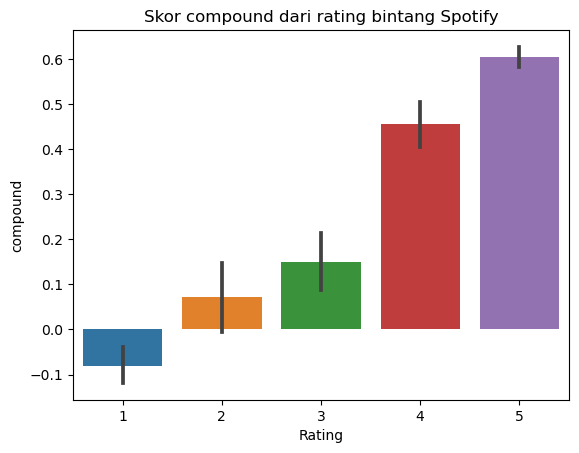

In [43]:
ax = sns.barplot(data=vader, x='Rating', y='compound')
ax.set_title('Skor compound dari rating bintang Spotify')
plt.show()

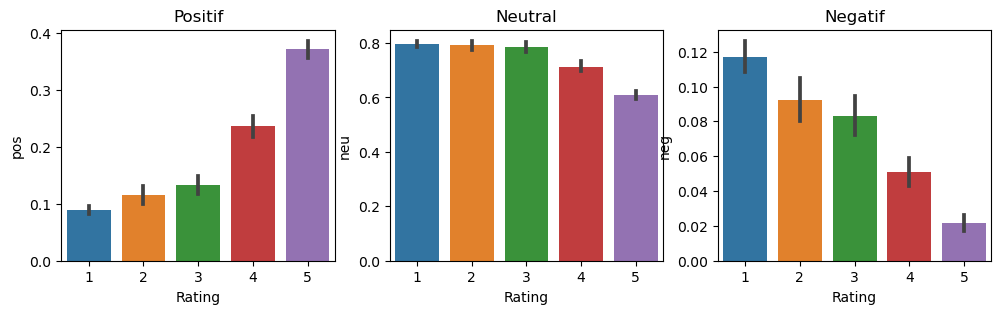

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=vader, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vader, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vader, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positif')
axs[1].set_title('Neutral')
axs[2].set_title('Negatif')
plt.show()

In [45]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax

In [46]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\ghari\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [47]:
print(test)
stm.polarity_scores(test)

It’s the best App I have ever used for listening music. There are numerous options, playlists and specially blends.Spotify really knows me well. It creates playlists by my favourite songs which is appreciated. Artist mix,genre mix,mood mix these are so good. I like using Spotify. But I wish there were a few more advantages for those who use a free account. For example skipping more than 6 songs.


{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.968}

In [48]:
encoded_text = tokenizer(test, return_tensors='tf')
output = model(**encoded_text)
rating = output[0][0].numpy()
rating = softmax(rating)
rating_dict = {
    'roberta_neg' : rating[0],
    'roberta_neu' : rating[1],
    'roberta_pos' : rating[2]
}
print(rating_dict)

{'roberta_neg': 0.0033320158, 'roberta_neu': 0.013305945, 'roberta_pos': 0.983362}


In [49]:
def polarity_rating_roberta(test):
    encoded_text = tokenizer(test, return_tensors='tf')
    output = model(**encoded_text)
    rating = output[0][0].numpy()
    rating = softmax(rating)
    rating_dict = {
        'roberta_neg' : rating[0],
        'roberta_neu' : rating[1],
        'roberta_pos' : rating[2]
    }
    return rating_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    review = row['Review']
    myid = row['Id']
    vader_result = stm.polarity_scores(review)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_rating_roberta(review)
    both = {**vader_result_rename, **roberta_result}
    res[myid] = both

  0%|          | 0/2000 [00:00<?, ?it/s]

In [39]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

In [40]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,1,0.000,0.564,0.436,0.9211,0.001777,0.011221,0.987002,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2,0.243,0.353,0.404,0.6249,0.005945,0.021682,0.972373,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,3,0.107,0.635,0.258,0.5859,0.860254,0.112997,0.026749,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,4,0.296,0.704,0.000,-0.5209,0.975654,0.022176,0.002171,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,5,0.000,0.740,0.260,0.7149,0.878104,0.114142,0.007755,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [1]:
df.head()

NameError: name 'df' is not defined